# Author: Aqib Aziz

---------------------------------------------------------
## Clustering of the IRIS data set
This model is for classifying the iris flowers using kmeans clustering. K-Mean clustering is an unsupervised learning algorithm. 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.cluster import KMeans

### Loading dataset

In [12]:
iris = datasets.load_iris()
iris.data[:5]  # loading 1st 5 rows

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Visualizing the iris data

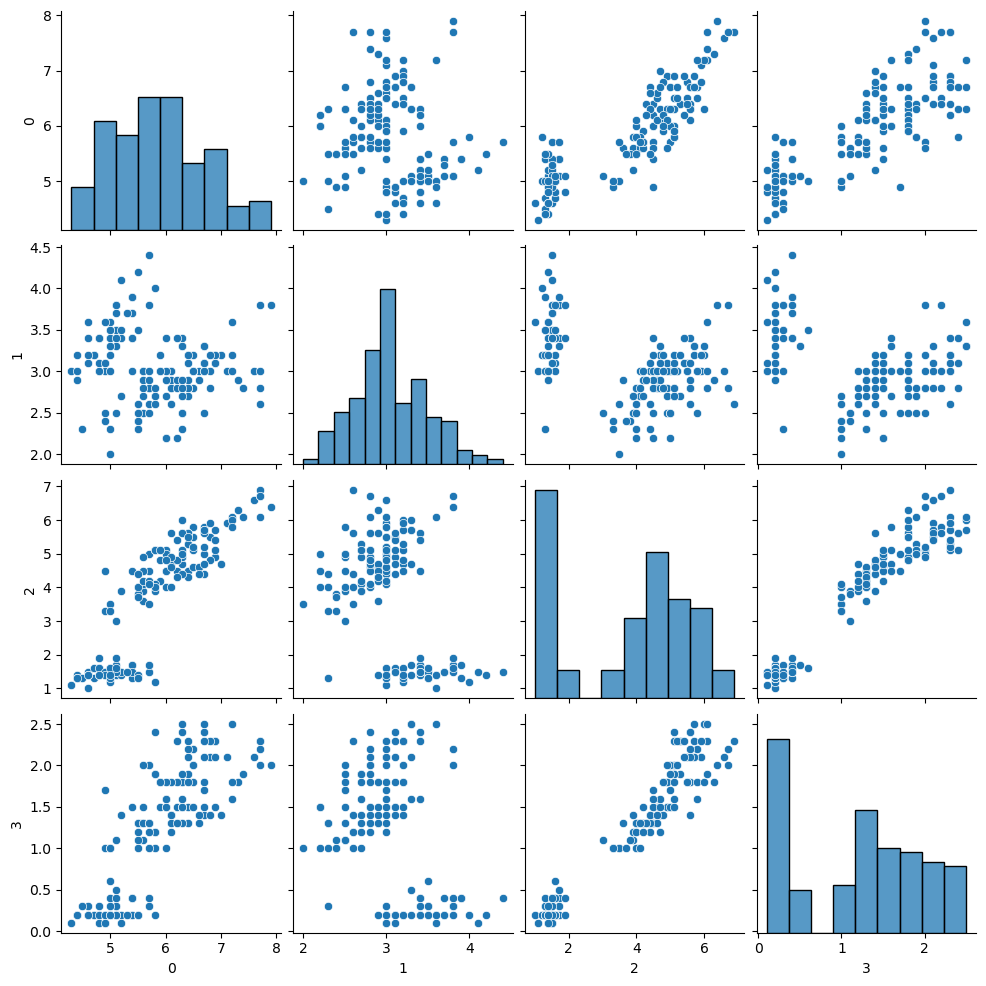

In [13]:
df  = pd.DataFrame(iris.data)
sns.pairplot(df)

### Defining Features and Labels

In [14]:
features = pd.DataFrame(iris.data, columns=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"])
labels = pd.DataFrame(iris.target, columns=["Labels"])


Text(0, 0.5, 'Petal Width')

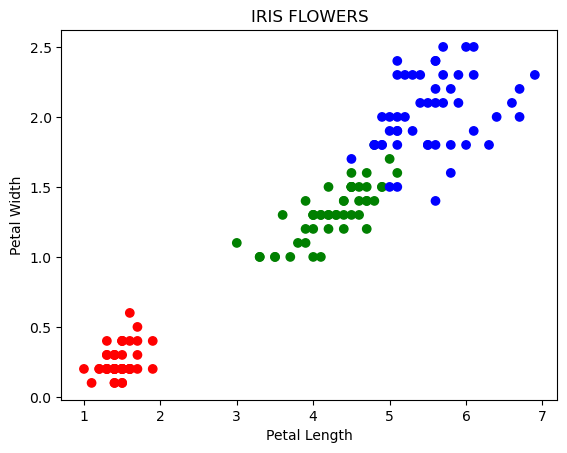

In [15]:
colors = np.array(['red', 'green', 'blue'])

plt.scatter(features["Petal Length"], features["Petal Width"], c=colors[labels["Labels"]])
plt.title("IRIS FLOWERS")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")


### Model- For clustering

In [16]:
model = KMeans(n_clusters = 3)
model.fit(features)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [17]:
predicted_labels = model.labels_
predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### Comparing Actual and Predicted

Text(0.5, 1.0, 'Predicted')

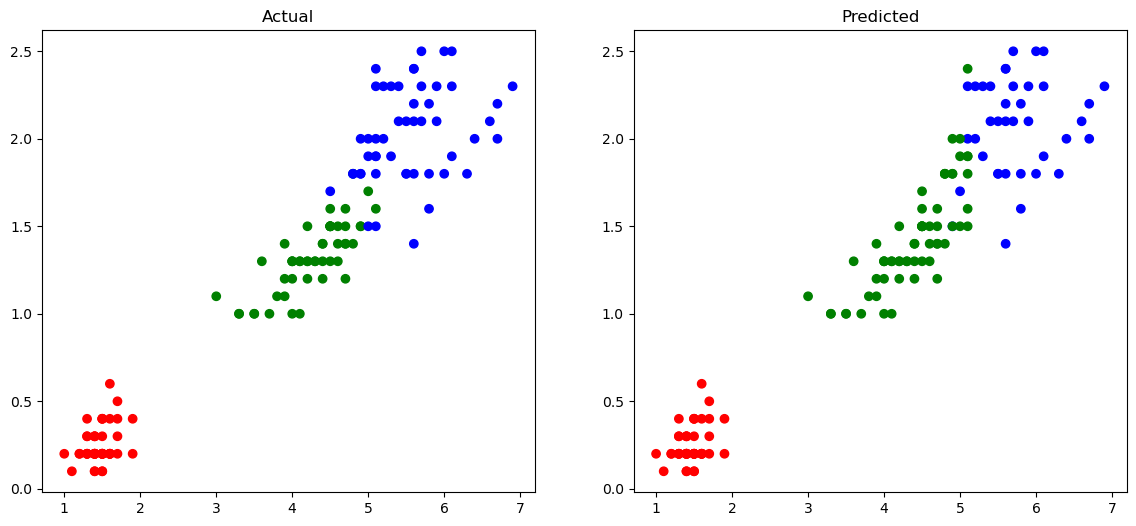

In [18]:

plt.figure(figsize=(14,6))

colors = np.array(['red', 'green', 'blue'])
predicted_labels = np.choose(model.labels_, [0, 1, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(features['Petal Length'], features['Petal Width'], c=colors[labels["Labels"]])
plt.title("Actual")


plt.subplot(1, 2, 2)
plt.scatter(features['Petal Length'], features['Petal Width'], c=colors[predicted_labels])
plt.title("Predicted")


#### Calculating accuracy

In [20]:
accuracy = sm.accuracy_score(predicted_labels, labels)
print(round(accuracy * 100, 2), "%")

89.33 %


In [21]:
print("Confusion Matrix: \n", sm.confusion_matrix(predicted_labels, labels))

print("-------------------------------------------------------")

Confusion Matrix: 
 [[50  0  0]
 [ 0 48 14]
 [ 0  2 36]]
-------------------------------------------------------


### Testing the model with a sample test point

In [22]:
test = np.array([6.4, 3.2, 4.5, 1.5])  # test sample
test = test.reshape(1, -1)
pred = model.predict(test)
print("----------------------------------------------------------")
print("Predicted result of Test Sample:\n")
if pred==0:
    print("Setosa \n")
if pred == 1:
    print("Versicolor \n")
if pred == 2:
    print("Verginica \n")
print("----------------------------------------------------------")

----------------------------------------------------------
Predicted result of Test Sample:

Versicolor 

----------------------------------------------------------


C:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


### TASK ENDED